### 1.Data Cleaning And Preparation

#### a. Load the dataset into a Pandas DataFrame and display the first five rows.

In [3]:
import pandas as pd # Importing the pandas library manipulation and analysis

data = pd.read_csv('ecommerce_data.csv') # Read and store the csv file as "data" in DataFrame

print(data.head()) # Using head() to display only first 5 rows of the file 

   Order ID     Product     Category  Quantity Ordered  Price Each  \
0         1      Laptop  Electronics                 1      834.18   
1         2       Shoes      Apparel                 4      903.27   
2         3      Laptop  Electronics                 2      365.51   
3         4      Pillow   Home Goods                 5      169.17   
4         5  Smartphone  Electronics                 5      498.51   

            Order Date      City  Customer ID  
0  2024-07-28 15:26:51   Chicago         4676  
1  2024-01-26 13:10:16  New York         1891  
2  2024-12-02 20:36:02   Chicago         4254  
3  2024-04-27 02:18:27   Houston         2859  
4  2024-03-31 06:02:42   Phoenix         5713  


#### b. Check for missing or null values in the dataset. Handle these appropriately. 

In [5]:
print(data.isnull().sum()) # isnull() is for checking the missing values in Dataframe and sum() is for count of missing values in each column.

Order ID            0
Product             0
Category            0
Quantity Ordered    0
Price Each          0
Order Date          0
City                0
Customer ID         0
dtype: int64


In [6]:
data_cleaned = data.dropna() # Cleaning the data by dropping all rows containing missing values storing the data as "data_cleaned".
print(f"Number of rows after cleaning: {data_cleaned.shape[0]}") # Printing the number of rows in the cleaned dataset using the shape[0]

Number of rows after cleaning: 1000


#### c. Convert columns to appropriate data types (e.g., Order Date to datetime).

In [8]:
print(data_cleaned.dtypes) # Printing the data types of each column in the cleaned DataFrame.

Order ID              int64
Product              object
Category             object
Quantity Ordered      int64
Price Each          float64
Order Date           object
City                 object
Customer ID           int64
dtype: object


In [9]:
# Converting the "Order Date" column in the cleaned DataFrame to datetime format to use the column for further time-based analysis.
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'])

In [10]:
# Ensuring that the format has been successfully changed by printing the data type.
print(data_cleaned.dtypes)

Order ID                     int64
Product                     object
Category                    object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
City                        object
Customer ID                  int64
dtype: object


#### d. Create a new column, Total Price, which is the product of Quantity Ordered and Price Each

In [12]:
# Creating or adding a new column "Total Price" by multiplying "Quantity Ordered" and "Price Each" columns.
data_cleaned['Total Price'] = data_cleaned['Quantity Ordered'] * data_cleaned['Price Each']
# We should have mention the Dataframe name along with the column names as we had changed the name of the data while cleaning it.
print(data_cleaned.head()) # Using head() to display first 5 rows of the data to ensure the column "Total Price" has been added.

   Order ID     Product     Category  Quantity Ordered  Price Each  \
0         1      Laptop  Electronics                 1      834.18   
1         2       Shoes      Apparel                 4      903.27   
2         3      Laptop  Electronics                 2      365.51   
3         4      Pillow   Home Goods                 5      169.17   
4         5  Smartphone  Electronics                 5      498.51   

           Order Date      City  Customer ID  Total Price  
0 2024-07-28 15:26:51   Chicago         4676       834.18  
1 2024-01-26 13:10:16  New York         1891      3613.08  
2 2024-12-02 20:36:02   Chicago         4254       731.02  
3 2024-04-27 02:18:27   Houston         2859       845.85  
4 2024-03-31 06:02:42   Phoenix         5713      2492.55  


### 2. Sales Analysis

In [14]:
Revenue = data_cleaned['Total Price'].sum()
print(Revenue) 

1578547.12


#### a. Calculate the total revenue generated by the city.

In [16]:
# Calculating Revenue by multiplying "Quantity Order" and "Price Each" columns as we did to calculate the Total Price.
data_cleaned['Revenue'] = data_cleaned['Quantity Ordered'] * data_cleaned['Price Each']
Revenue = data_cleaned['Revenue'] # Assigning "data_cleaned["Revenue"] as "Revenue" for further ease

# Grouping the cleaned data by "City" and calculating the total "Revenue" for each city.
revenue_by_city = data_cleaned.groupby('City')['Revenue'].sum().reset_index()
# groupby() - groups the rows that have the same city name # sum() - calculates the total revenue of each group 
# reset_index() - store the result into a clean DataFrame.
print(revenue_by_city) # Printing the result to display total revenue by city.

          City    Revenue
0      Chicago  188616.21
1       Dallas  181207.13
2      Houston  206380.13
3  Los Angeles  214139.13
4     New York  199971.19
5      Phoenix  200823.90
6  San Antonio  183016.12
7    San Diego  204393.31


#### b. Identify the top 5 products based on total sales revenue.

In [18]:
# Grouping the cleaned data by "Product" and calculating the "Revenue" for each product and storing the result into the DataFrame.
revenue_by_products = data_cleaned.groupby('Product')['Revenue'].sum().reset_index()

# Sorting the "revenue_by_products Dataframe by the "Revenue" column in descending order 
# It will put the products with highest revenue at the top. 
# head() function selects the top 5 products
top_5_products = revenue_by_products.sort_values(by='Revenue', ascending=False).head()

# printing the top 5 products by revenue.
print(top_5_products)


       Product    Revenue
12  Smartphone  126562.51
11       Shoes  115038.76
7        Jeans  114699.49
9       Laptop  112218.17
10      Pillow  111572.81


#### c. Find the month with the highest sales and plot a graph to show monthly revenue.



In [20]:
# Extracting the month from "Orer Date" column and storing it in another column name "Month".
data_cleaned['Month'] = data_cleaned['Order Date'].dt.month
# The dt. accessor allows access to datetime properties like year, month, day, etc. 

print(data_cleaned['Month']) # Printing the "Month" column to verify the extracted values.


0       7
1       1
2      12
3       4
4       3
       ..
995     6
996     7
997     6
998    11
999     4
Name: Month, Length: 1000, dtype: int32


In [21]:
# Grouping the data by "Month" and calculating the "Revenue" for each month
revenue_by_month = data_cleaned.groupby('Month')['Revenue'].sum().reset_index()

# sorting the monthly revenue in descending order to find the month with the highest revenue.
top_month = revenue_by_month.sort_values(by='Revenue', ascending=False).head(1)

print(top_month) # Printing the top month with the highest total revenue

   Month   Revenue
6      7  174472.2


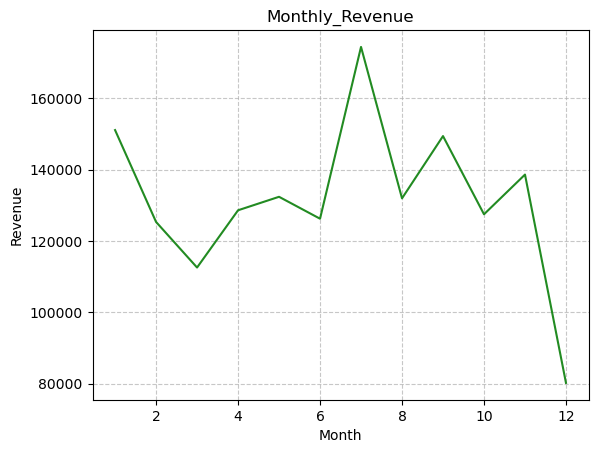

In [22]:
# Importing matplotlib for plotting 
import matplotlib.pyplot as plt
# Plotting the revenue trend over months using line chart
# X axis with month and Y axis with Revenue
plt.plot(revenue_by_month['Month'],revenue_by_month['Revenue'], color='forestgreen')
plt.xlabel("Month") # Label X-axis
plt.ylabel("Revenue") # Label Y-axis
plt.title("Monthly_Revenue") # Name the title of the chart
plt.grid(True, linestyle='--', alpha=0.7) # Adding grid() by anables it by 'True',
# making linestyle as dashed and slightly transparent by adding alpha=0.7

plt.show() # Displaying the plot


### 3.Category and City Analysis
#### a. Group the data by Category and calculate the total revenue for each category.

In [24]:
# Grouping the data by "Category" and calculating the "Revenue" of each category
revenue_by_category = data_cleaned.groupby('Category')['Revenue'].sum().reset_index()
print(revenue_by_category)


      Category    Revenue
0      Apparel  546446.34
1  Electronics  523641.32
2   Home Goods  508459.46


#### b. Find the city with the highest number of orders.

In [26]:
# Grouping the data by "city" and calculating the "Quantity Ordered" for each group
group_by_city = data_cleaned.groupby('City')['Quantity Ordered'].sum().reset_index()

# Sorting the group_by_city in Discending order to find the city with highest "Quantity Ordered"
highest_orders_by_city = group_by_city.sort_values(by='Quantity Ordered', ascending=False).head()
print(highest_orders_by_city) # Printing the city with highest order 
print("\n--------------------")
print("City with the highest number of orders is:")
print( highest_orders_by_city.head(1)) # Prining the top city with highest order

          City  Quantity Ordered
2      Houston               401
5      Phoenix               400
3  Los Angeles               398
7    San Diego               384
4     New York               376

--------------------
City with the highest number of orders is:
      City  Quantity Ordered
2  Houston               401


#### c. Plot a bar chart to visualize revenue across different cities.

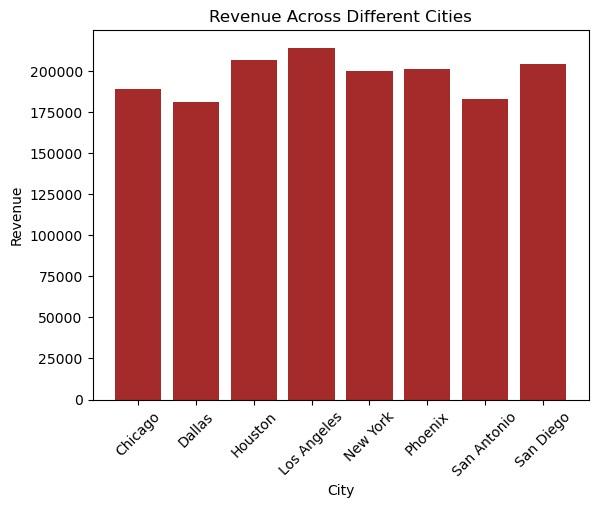

In [28]:
# Creating a bar chart to visualize revenue for each city
plt.bar(revenue_by_city['City'], revenue_by_city['Revenue'], color='brown')
# Labeling X-axis, Y-axis and the title of the chart
plt.title("Revenue Across Different Cities")
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45) # Rotating the X-axis labels by 45 degrees to improve readability
plt.show()

#### * Plotting the Pie Chart to visualize revenue across different cities.

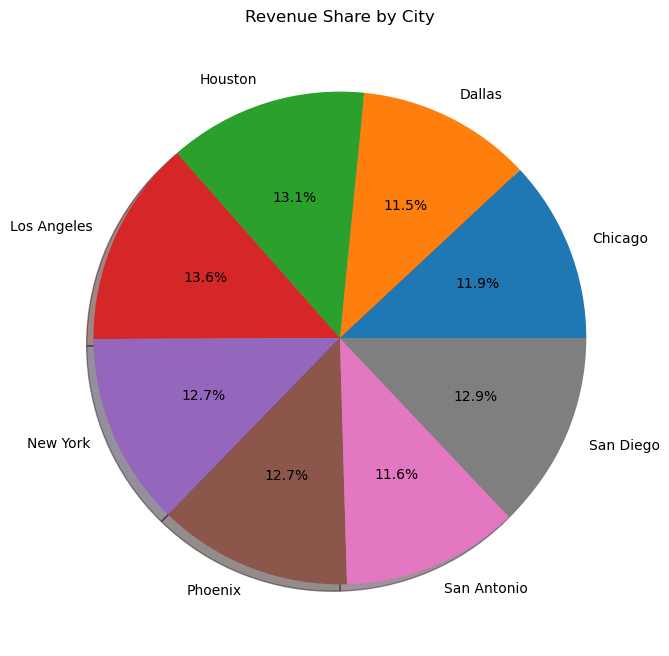

In [30]:
# Creating a pie chart to show the proportion of revenue from each city
plt.figure(figsize=(8, 8))  # Set the size of the pie chart

# Plotting the pie chart
plt.pie(revenue_by_city['Revenue'], labels=revenue_by_city['City'], autopct ='%1.1f%%', shadow=True) 
 # Labels are city names # Display percentage with 1 decimal place # Adding shadow 

# Adding a title
plt.title("Revenue Share by City")

# Displaying the pie chart 
plt.show()


### 4.Customer Behavior Analysis
#### a. Identify the customer who spent the most money and calculate their total spending.

In [32]:
# Grouping the data by "Customer ID" and calculating total revenue per customer
revenue_by_customer = data_cleaned.groupby('Customer ID')['Revenue'].sum().reset_index()

# Sorting the result in descending order to get customers who spend most
top_customer = revenue_by_customer.sort_values(by='Revenue', ascending=False).head()
print(top_customer) # Printing the top 5 customers 
print("\n----------------")
print("Customer who spent most money is:")
print(top_customer.head(1)) # Printing the top customer who spend the most money

     Customer ID  Revenue
384         4626  8100.03
743         7838  6739.26
742         7834  6605.41
920         9758  6595.04
676         7196  6412.63

----------------
Customer who spent most money is:
     Customer ID  Revenue
384         4626  8100.03


#### b. Find the average order value (AOV) for all customers.

In [34]:
# Calculating the total revenue by summing all the values in the "Revenue" column
Total_Revenue = data_cleaned['Revenue'].sum()
 
# Calculating the total numbers of orders by summing the "Quantity ordered" column
Total_Orders = data_cleaned['Quantity Ordered'].sum()

# Calculating the Average Order vakue(AOV)
# AOV = Total Revenue / Total Quantity Orders
average_order_value = Total_Revenue/Total_Orders

print("Total Revenue :", Total_Revenue) # Printing the Total Revenue
print("Total Orders :", Total_Orders) # Printing the Total Quantity Orders 

print("Average Order Value =",round(average_order_value, 2)) 
# Printing the Average Order Value and rounded to 2 decimal places for readability

Total Revenue : 1578547.12
Total Orders : 3042
Average Order Value = 518.92


#### c. Determine the product most frequently purchased by customers.

In [36]:
# Grouping the cleaned data by "Product" and calculating the total "Quantity Ordered" for each product
product_purchase = data_cleaned.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sorting the "product_purchase" DataFrame by "Quantity Ordered" in descending order
# it will identify which product was purchased the most 
frequently_purchased_product = product_purchase.sort_values(by='Quantity Ordered', ascending=False).head(1)

# Printing the most frequantly purchased product
print("The Product most frequently purchased by customer is:")
print(frequently_purchased_product)

The Product most frequently purchased by customer is:
       Product  Quantity Ordered
12  Smartphone               247


### 5.Bonus (Optional)
#### a. Extract the hour from the Order Date column and determine the hour with the highest sales.

In [38]:
# Extracting the hour from the "Order Date" column and storing it in a new co;umn "Hour"
data_cleaned['Hour'] = data_cleaned['Order Date'].dt.hour

# Grouping the data by hour and summing up the revenue for each hour
highest_sales_hour = data_cleaned.groupby('Hour')['Revenue'].sum().reset_index()

# Sorting the "highest_sales_hour" data in descending order to find the hour with the highest revenue
hour_with_highest_sales = highest_sales_hour.sort_values(by='Revenue', ascending=False).head(1)

print(hour_with_highest_sales) # Printing the hour with the highest sales/revenue.

    Hour  Revenue
15    15  99815.5


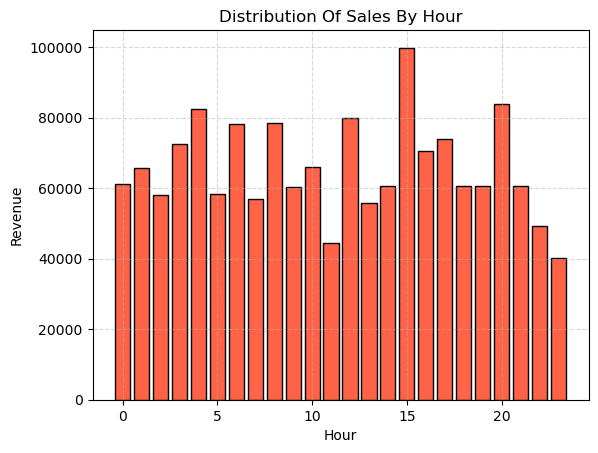

In [39]:
# Creating a bar chart to visualize total revenue for each hour of the day
plt.bar(highest_sales_hour['Hour'], highest_sales_hour['Revenue'], color='tomato', edgecolor='black') # Adding color of the bar and edgecolor of the bar
plt.title("Distribution Of Sales By Hour")
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()